In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

미션
1. pandas & seaborn 활용
2. 데이터
        
        seaborn 자체의 titanic 데이터
3. 참조
        kaggle eda 범주로 구분된 공유자료 선별해서 응용
4. 제출시간
5. 팀구성 두명

# 데이터 로드

In [2]:
data = sns.load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [14]:
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [11]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 각 컬럼은 어떤 값이 있을까??

In [22]:
for i in data.columns:
    print(i, ": \n", data[i].unique(),"\n\n")
    

survived : 
 [0 1] 


pclass : 
 [3 1 2] 


sex : 
 ['male' 'female'] 


age : 
 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ] 


sibsp : 
 [1 0 3 4 2 5 8] 


parch : 
 [0 1 2 5 3 4 6] 


fare : 
 [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      

### 변수 유형을 파악해보았다
    -> kaggle data와 변수 몇개가 다르다
    

범주형 변수 : 

    Sex    
    Pclass : passenger class  
    Embarked : port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)  
    class : 이것도 클래스임. Pclass와 중복됨  
    who,   
    deck,   
    embark_town : embarked와 중복됨  
    Sibsp : 형제자매나 배우자 수  
    Parch : 부모나 아이의 수  


    - true or false
    Survived
    adult_male(bool)
    alive
    alone


숫자형 변수 : 

    Fare
    age

In [45]:
# 칼럼의 첫 문자를 대문자로 바꿈
data.columns = data.columns.str.capitalize()

In [46]:
data

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,Class,Who,Adult_male,Deck,Embark_town,Alive,Alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True



## 범주형 변수로 barplot 그려보기

In [73]:
# 함수를 만들고 각 데이터를 넣어서 그림
def bar_plot(variable):

    # get feature
    var = data[variable]
    
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

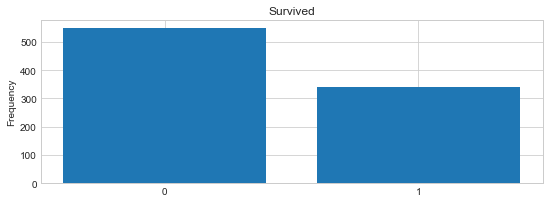

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


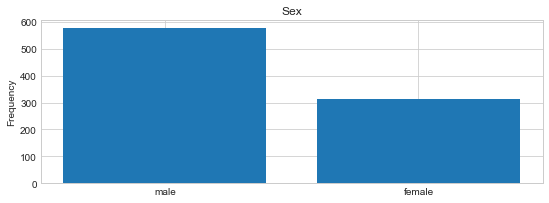

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


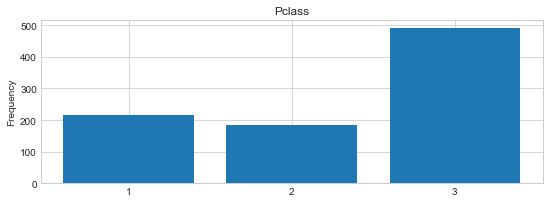

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


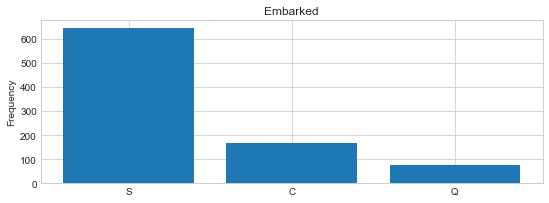

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


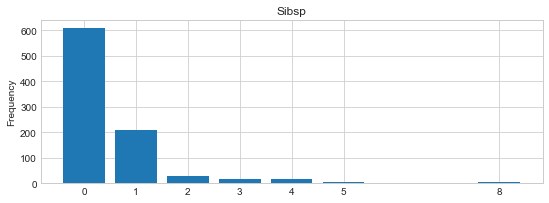

Sibsp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: Sibsp, dtype: int64


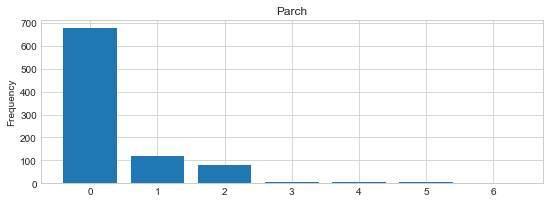

Parch: 
 0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


In [47]:
category1 = ["Survived","Sex","Pclass","Embarked","Sibsp", "Parch"]
for c in category1:
    bar_plot(c)

## 숫자형 변수로 그래프 그리기

In [50]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

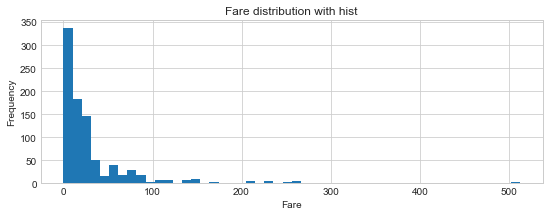

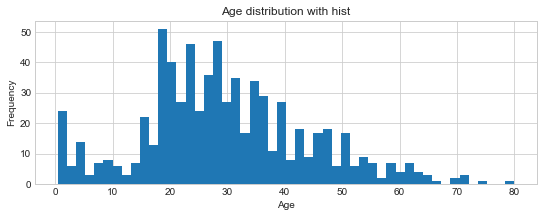

In [51]:
numericVar = ["Fare", "Age"]
for n in numericVar:
    plot_hist(n)

## 기본적인 분석

In [53]:
# Pclass vs Survived
data[["Pclass","Survived"]].groupby(["Pclass"], 
                                    as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass를 기준으로 그룹화해서 생존자의 평균을 구해보았다.  
생존여부가 1, 0으로 코딩되어 있어서 평균값은 생존한 비율을 의미한다.

In [55]:
# Sex vs Survived
data[["Sex","Survived"]].groupby(["Sex"], 
                                     as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


성별을 기준으로 생존율을 구해보니 여성이 74%정도로 남성의 18%보다 매우 높은 비율로 살아남았다

In [58]:
# Sibsp vs Survived
data_sib_sur = data[["Sibsp","Survived"]].groupby(["Sibsp"], 
                                   as_index = False).mean().sort_values(by="Survived",ascending = False)
data_sib_sur

,Sibsp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


형제 자매나 배우자 수가 적을경우 생존한 비율이 높았다.


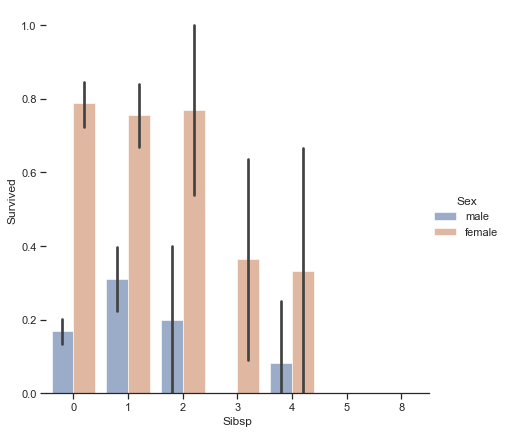

In [83]:
g = sns.catplot(
    data=data, kind="bar",
    x="Sibsp", y="Survived", hue = 'Sex', alpha=.6, height=6
)
g.despine(left=True)
g.legend.set_title("Sex")

0, 1, 2 명일때 더 많이 생존했다고 볼 수 있지만 생존비율인지는 모르겠음

-------------------------

## 그냥 아무거나 그려보기

### Age에 따른 Fare의 분포를 파악

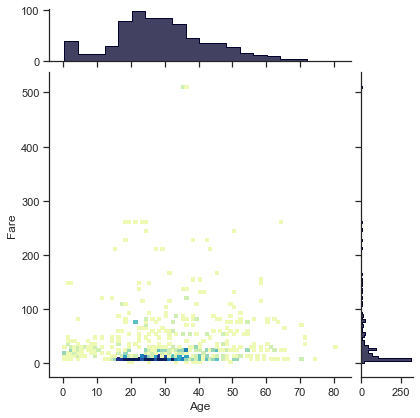

In [91]:

sns.set_theme(style="ticks")

g = sns.JointGrid(data=data, x="Age", y="Fare", marginal_ticks=True)


# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="YlGnBu", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

### 두번쨰 : Age에따른 Fare의 분포를 Deck 별로 표현

<AxesSubplot:xlabel='Age', ylabel='Fare'>

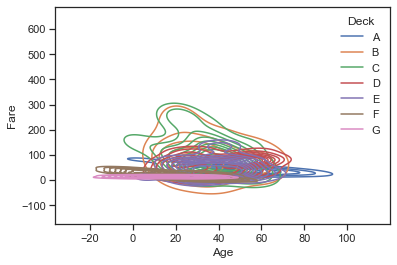

In [99]:
sns.kdeplot(
    data=data,
    x="Age",
    y="Fare",
    hue="Deck",
    thresh=.1,
)

>C Deck과 B덱이 높은 금액대 까지 분포해 있음을 알 수 있다.

### Embark_town x Fare x Class

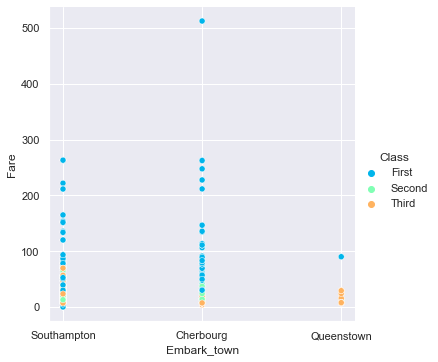

In [109]:
sns.set_style(style = 'darkgrid')
sns.relplot(x = 'Embark_town', y = 'Fare', data = data, hue = 'Class', palette = 'rainbow');